# Investigation of No-Show Medical Appointments 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.


# Dataset Description

Name	Value(s)	Description

- Patient_ID number	identification of a patient

- Appointment_ID	number	identification of each appointment

- Gender	F or M	it says 'F' if female or 'M' if man

- Scheduled_Day date	tells us on what day the patient set up their appointment

- Appointment_Day	date	the day of the actuall appointment, when they have to visit the doctor

- Age	number	how old is the patient

- Neighbourhood	string	indicates the location of the hospital

- Scholarship	0 or 1	indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família

- Hypertension	0 or 1	indicates if the patient has hipertension

- Diabetes	0 or 1	indicates if the patient has diabetes

- Alcoholism	0 or 1	indicates if the patient is an alcoholic

- Handcap	0 or 1	indicates if the patient is handicaped

- SMS_received	0 or 1	, 1 or more messages sent to the patient

- No-show	Yes or No	it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up


In [3]:
df = pd.read_csv('/Users/anujarora/Downloads/Udacity-Data-Analyst-Nanodegree-master/3. Medical Appointment/med_data.csv')
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Below are the steps involved to understand, clean and prepare our data for data exploration or building a predictive model:

- Variable Identification
- Univariate Analysis
- Bi-variate Analysis
- Missing values treatment
- Outlier treatment
- Variable transformation
- Variable creation

# Variable Identification

In [5]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [8]:
df.rename(columns = {'No-show': 'NoShow','Handcap': 'Handicap', 'Hipertension' : 'Hypertension','PatientId': 'Patient_ID','AppointmentID' : 'Appointment_ID', 'ScheduledDay' : 'Scheduled_Day', 'AppointmentDay' : 'Appointment_Day'}, inplace = True)
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Type of variable

Predictor variables

- Gender
- ScheduledDay
- AppointmentDay
- Age
- Neighbourhood
- Scholarship
- Hipertension
- Diabetes
- Alcoholism
- Handcap
- SMS_received

Target variable

- NoShow

Data Type

- Character

Gender , Scheduled_Day, Appointment_Day , Neighbourhood, No-show

- Numeric 

Patient_ID, Appointment_ID, Age, Scholarship, Hypertension, Diabetes, Alcoholism, Handcap, SMS_received

Variable Category

- Categorical

    'Gender', 'Neighbourhood', 'Scholarship', 'Hipertension',
   'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'NoShow'

In [9]:
# Check Null Values

In [10]:
df.isnull().sum()

Patient_ID         0
Appointment_ID     0
Gender             0
Scheduled_Day      0
Appointment_Day    0
Age                0
Neighbourhood      0
Scholarship        0
Hypertension       0
Diabetes           0
Alcoholism         0
Handicap           0
SMS_received       0
NoShow             0
dtype: int64

In [11]:
# Structure of Data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Patient_ID         110527 non-null float64
Appointment_ID     110527 non-null int64
Gender             110527 non-null object
Scheduled_Day      110527 non-null object
Appointment_Day    110527 non-null object
Age                110527 non-null int64
Neighbourhood      110527 non-null object
Scholarship        110527 non-null int64
Hypertension       110527 non-null int64
Diabetes           110527 non-null int64
Alcoholism         110527 non-null int64
Handicap           110527 non-null int64
SMS_received       110527 non-null int64
NoShow             110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Here are some initial observations:

- There are 13 independent variables and one dependent (no_show) in the dataset.
- The dataset does not contain any missing values (NaNs).
- The patient_id data type is float but should be int.
- The scheduled_day and appointment_day columns type should be changed to datetime.
- The appointment_day has no hour specified (it equals to 00:00:00). We will not be able to analyze if the appointment hour has anything to do with no shows.
- There could be interesting to know how much time passed between a visit scheduling time and the actual visit time. There is no such data column but this can be calculated from scheduled_day and appointment_day columns.
- Another interesting question would be how show and no-show appointments are distributed among days of week. To explore this we will calculate a column called appointment_dow.

In [13]:
# Data Type Conversion

In [14]:

# Convert that dateformat which is in string to datetime64[ns]

# The day of the week with Monday=0, Sunday=6

df['Scheduled_Day'] = df['Scheduled_Day'].apply(np.datetime64)

df['Day_Scheduled'] = df['Scheduled_Day'].dt.day
df['weekday_Scheduled'] = df['Scheduled_Day'].dt.dayofweek
df['Month_Scheduled'] = df['Scheduled_Day'].dt.month


df['Appointment_Day'] = df['Appointment_Day'].apply(np.datetime64)

df['Day_appointed'] = df['Appointment_Day'].dt.day
df['weekday_appointed'] = df['Appointment_Day'].dt.dayofweek
df['Month_appointed'] = df['Appointment_Day'].dt.month

df['Patient_ID'] = df['Patient_ID'].astype(int)

df['awaiting_time_days'] = (df.Appointment_Day - df.Scheduled_Day).dt.days

In [15]:
# Calculating No. of Appointments (Day of Week)
df['appointment_dow'] = df.Scheduled_Day.dt.weekday_name

# Check the values
df['appointment_dow'].value_counts()

Tuesday      26168
Wednesday    24262
Monday       23085
Friday       18915
Thursday     18073
Saturday        24
Name: appointment_dow, dtype: int64

The distribution of appointments among days of week (Monday-Friday) is almost equal with a little bit less visits on Thursday and Friday. There are 24 visits on Saturday and none on Sunday.

# Univariate Analysis

- Value Count

In [16]:
df['NoShow'].value_counts()

No     88208
Yes    22319
Name: NoShow, dtype: int64

In [17]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [18]:
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

- Unique Values

In [19]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [20]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [21]:
df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [22]:
df.Scholarship.unique()

array([0, 1])

In [23]:
df.Hypertension.unique()

array([1, 0])

In [24]:
df.Diabetes.unique()

array([0, 1])

In [25]:
df.Alcoholism.unique()

array([0, 1])

In [26]:
df.Handicap.unique()

array([0, 1, 2, 3, 4])

In [27]:
df.SMS_received.unique()

array([0, 1])

In [28]:
df.NoShow.unique()

array(['No', 'Yes'], dtype=object)

In [29]:
# Graphical Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fec2240>,
      dtype=object)

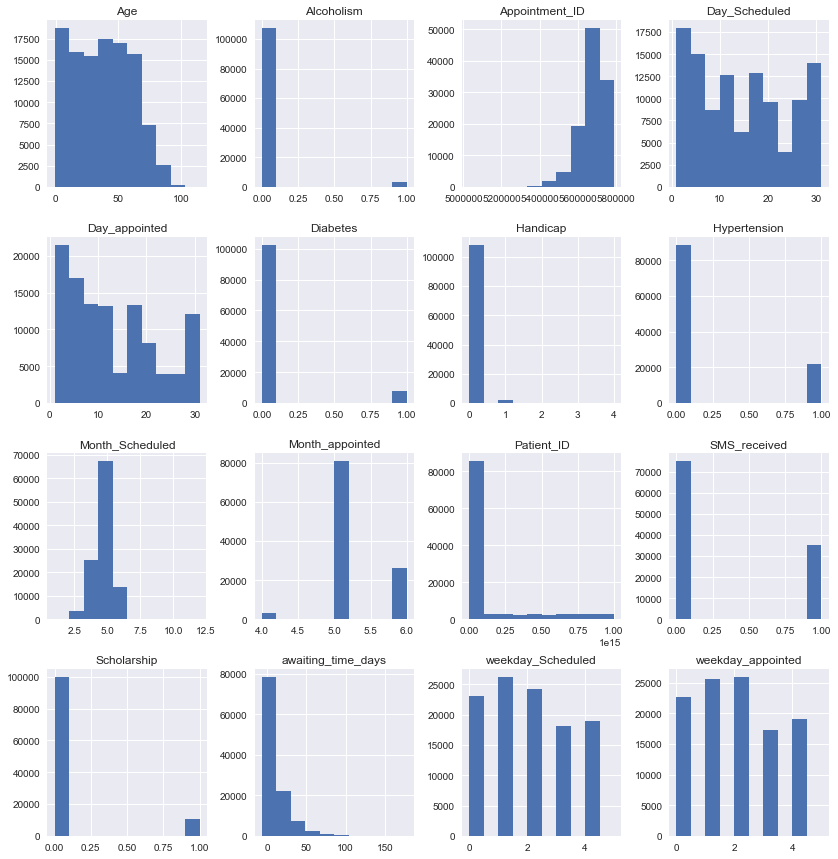

In [30]:
df.hist(figsize = (14,15))

Histogram observations
- age: There are many very young people in the dataset but in general the patients age is distributed evenly and the number of patients goes drastricly down for patients older than 60 years.
- alcoholism: Most of the patients are not alcoholics.
- diabetes: Most of the patients are not diabetes but more than alcoholics.
- handicap: There are for handicap categories with most of the people not being handicapted.
- hypertension: Most patients do not have hypertension diagnosed.


First we will look at the target variable, i.e., NoShow. 

As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot. Frequency table of a variable will give us the count of each category in that variable.

### TARGET VARIABLE - NOSHOW

In [31]:
# Normalise can be set to true to print the proportions instead of Numbers.
df['NoShow'].value_counts(normalize=True)

No     0.798067
Yes    0.201933
Name: NoShow, dtype: float64

Text(0,0.5,'Count')

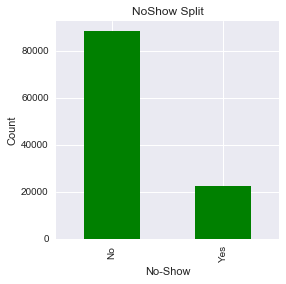

In [32]:
df['NoShow'].value_counts().plot.bar(figsize = (4,4), title = 'NoShow Split', color = 'g')
plt.xlabel('No-Show')
plt.ylabel('Count')

The patient records or instances who DO NOT show up on scheduled time are of 22,312 (around 20%) and who show up are 88,168(around 80%) out of total 110,480.


Now lets visualize each variable separately. Different types of variables are Categorical and numerical.

• Categorical features: These features have categories ('Gender', 'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show' )

• Numerical features: These features have numerical values (Age, Day_Scheduled and Day_appointed)

## NUMERICAL FEATURES

### AGE

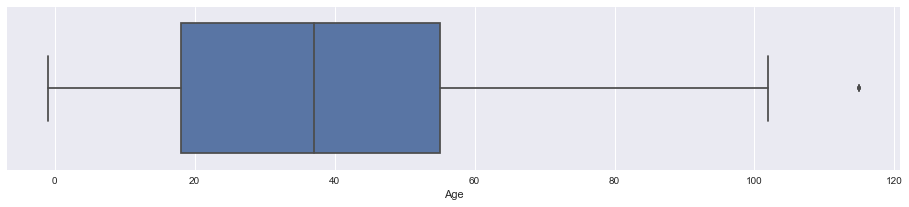

In [33]:
plt.figure(figsize=(16,3))
sns.boxplot(x=df.Age)

In [34]:
#Outlier detected

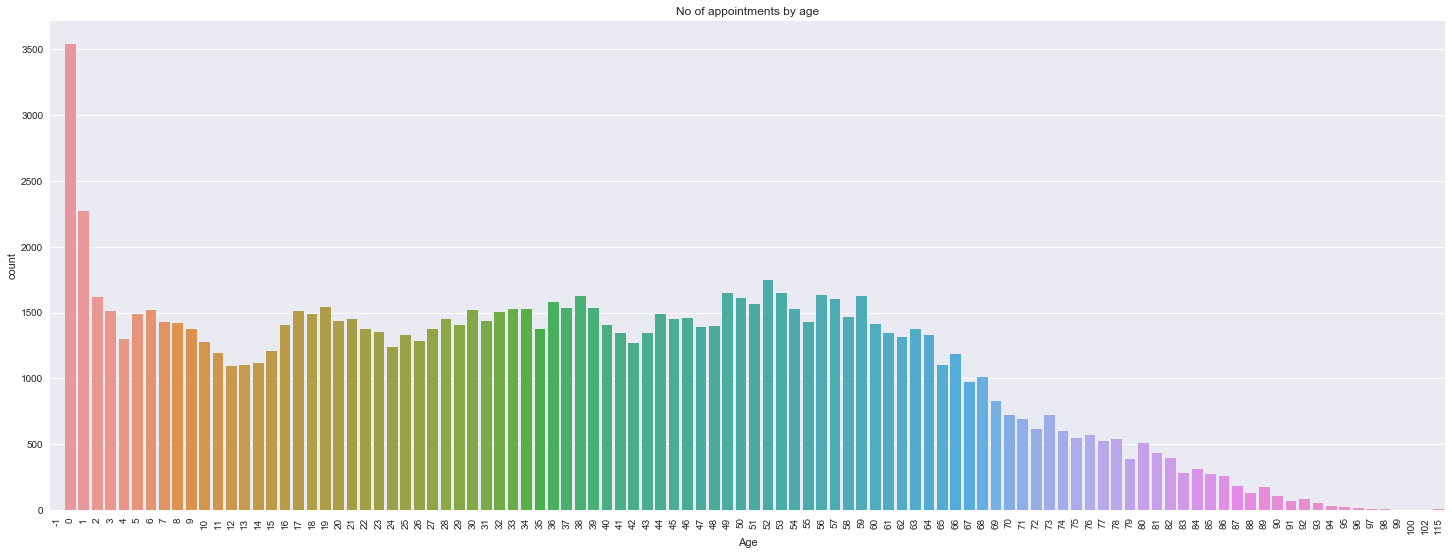

In [35]:
# Let's see how many there are patients of each age
plt.figure(figsize=(25,9))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age)
ax.set_title("No of appointments by age")
plt.show()

In [36]:
# Check how many records with age < 0 and age > 100
df.query('Age < 0  | Age > 100').count()

Patient_ID            8
Appointment_ID        8
Gender                8
Scheduled_Day         8
Appointment_Day       8
Age                   8
Neighbourhood         8
Scholarship           8
Hypertension          8
Diabetes              8
Alcoholism            8
Handicap              8
SMS_received          8
NoShow                8
Day_Scheduled         8
weekday_Scheduled     8
Month_Scheduled       8
Day_appointed         8
weekday_appointed     8
Month_appointed       8
awaiting_time_days    8
appointment_dow       8
dtype: int64

In [37]:
df.drop(df[(df.Age < 0) | (df.Age > 100)].index, inplace = True)

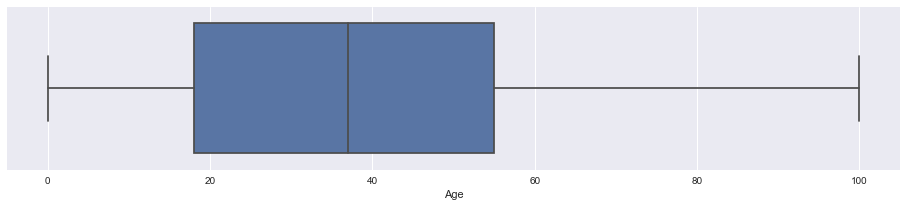

In [38]:
plt.figure(figsize=(16,3))
sns.boxplot(x=df.Age)

In [39]:
#outlier removed

### DAY_SCHEDULED

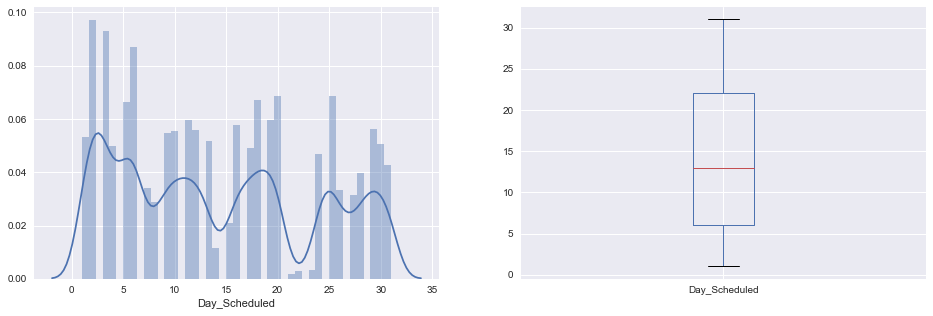

In [40]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Day_Scheduled'])


plt.subplot(122)
df['Day_Scheduled'].plot.box(figsize=(16,5))

plt.show()

### DAY_APPOINTED

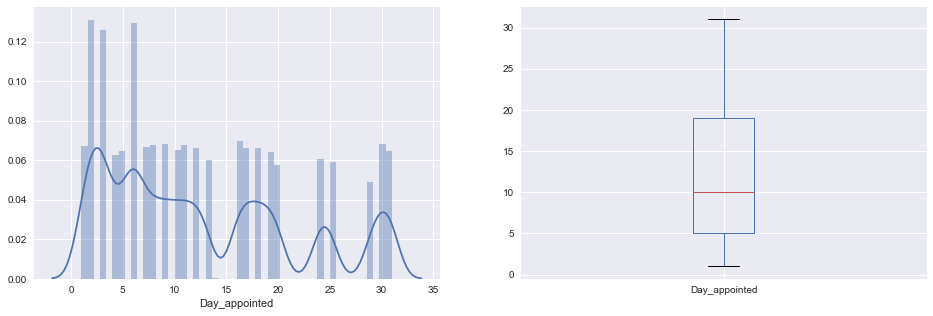

In [41]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Day_appointed'])


plt.subplot(122)
df['Day_appointed'].plot.box(figsize=(16,5))

plt.show()

## CATEGORICAL FEATURES

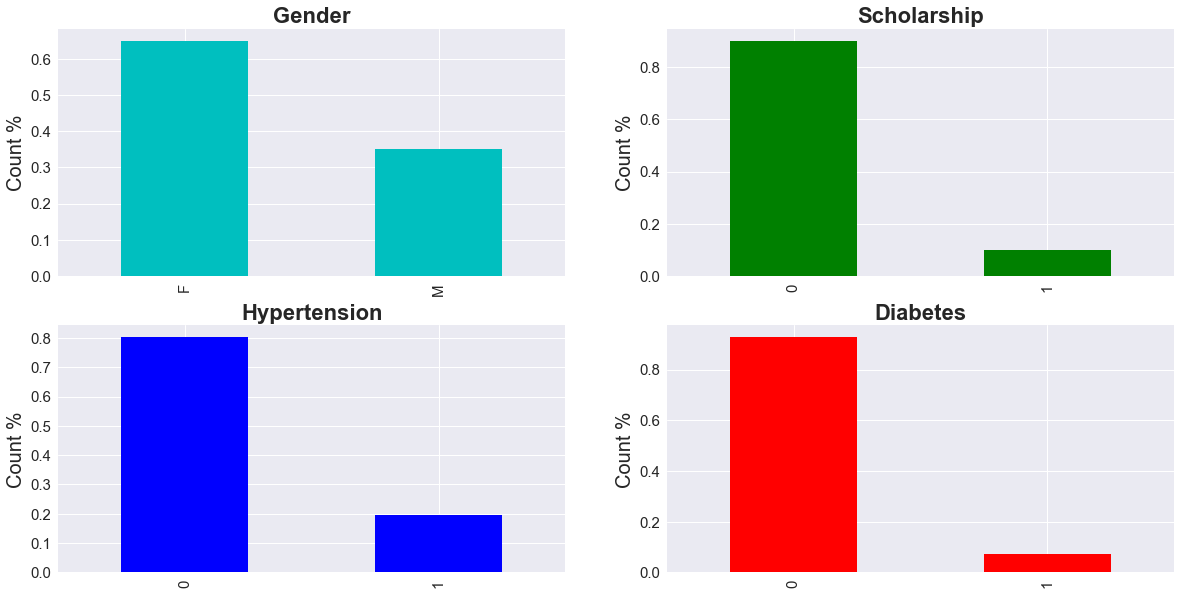

In [42]:
plt.figure(1)
plt.figure(figsize = (15,10))
iter_cols = ['Gender', 'Scholarship', 'Hypertension', 'Diabetes']
colour = ['c', 'g', 'b', 'r']

i = 0
for col in iter_cols:    
    plt.subplot(int(str(22)+str((iter_cols.index(col)+1))))
    df[col].value_counts(normalize=True).plot.bar(figsize=(20,10), fontsize = 15.0, color = colour[i])
    
    plt.title(col, fontweight="bold", fontsize = 22.0)
    plt.ylabel('Count %', fontsize = 20.0)
    
    i = i +1


It can be inferred from the above bar plots that:

- 65% patient instances are with female records
- Around 85% of the these instances are not having scholarship.
- 20% of patient instances have Hypertension.
- 88% of patient instances do not have diabetes

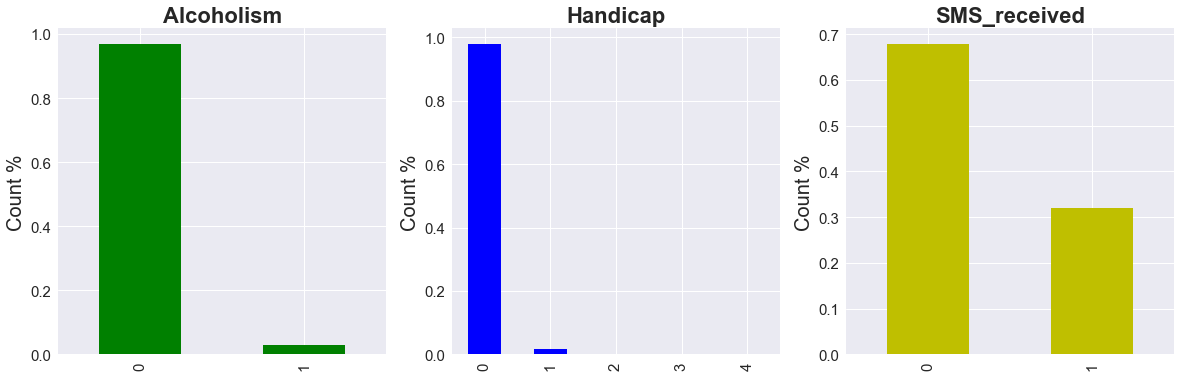

In [43]:
plt.figure(1)
plt.figure(figsize = (15,10))
iter_cols = ['Alcoholism', 'Handicap', 'SMS_received']
colour = ['g', 'b', 'y']

i = 0
for col in iter_cols:    
    plt.subplot(int(str(13)+str((iter_cols.index(col)+1))))
    df[col].value_counts(normalize=True).plot.bar(figsize=(20,6), fontsize = 15.0, color = colour[i])
    
    plt.title(col, fontweight="bold", fontsize = 22.0)
    plt.ylabel('Count %', fontsize = 20.0)
    
    i = i +1

It can be inferred from the above bar plots that:

- 98% patient instances are alcoholics.
- 99% of the patient instances are with Handicap status = 0
- 70% of the patient instances have received SMS regarding the appointment /scheduled time

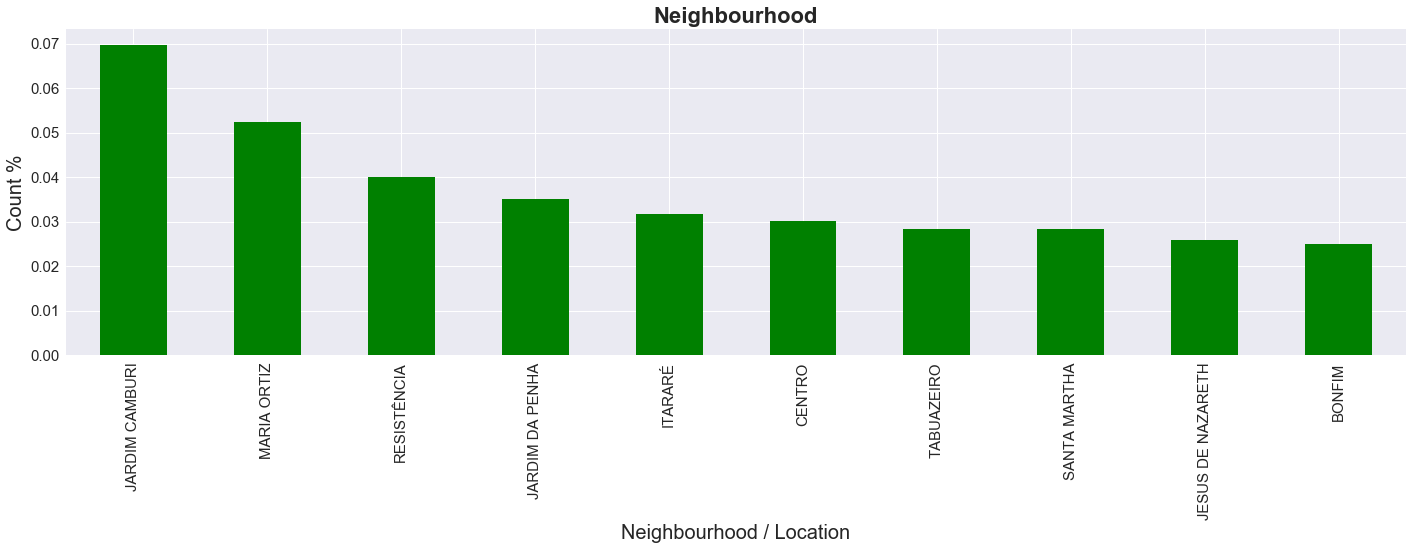

In [44]:
df['Neighbourhood'].value_counts(normalize=True).sort_values(ascending = False)[:10].plot.bar(figsize=(24,6), fontsize = 15.0, color = 'g')

plt.title('Neighbourhood', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)
plt.xlabel('Neighbourhood / Location', fontsize = 20.0)

plt.show()

JARDIM CAMBURI location has majority of the patient instances , followed by MARIA ORTIZ

# Bivariate Analysis

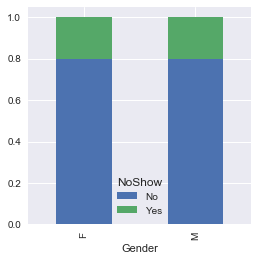

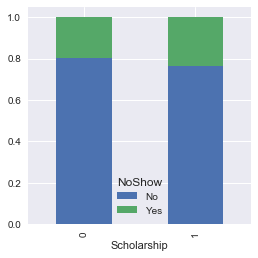

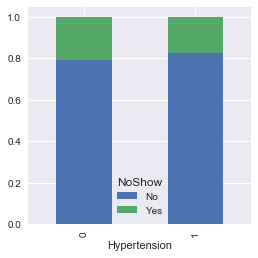

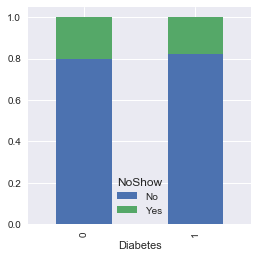

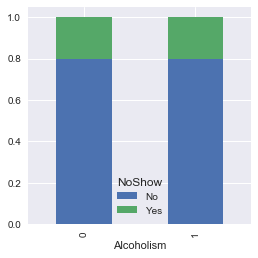

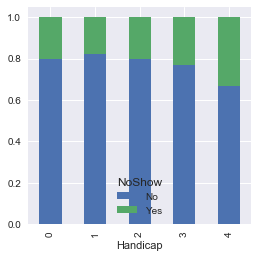

In [45]:
cat_list = ['Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']
for col in cat_list:
    col1 =pd.crosstab(df[col],df['NoShow'])
    col1.div(col1.sum(1).astype(float), axis=0).plot(kind="bar",  stacked=True, figsize=(4,4));

The inferences that can be made from here are:
    
- Not much of difference in Female/Male groups with "NoShow" status
- Instances who have scholarship have slightly more "NoShow" status
- Hypertension & Diabetes instances have more "NoShow" status
- Not much of difference in Alcoholism/Non-Alcoholism groups with "NoShow" status
- Handicap with category 4 have more "NoShow" status

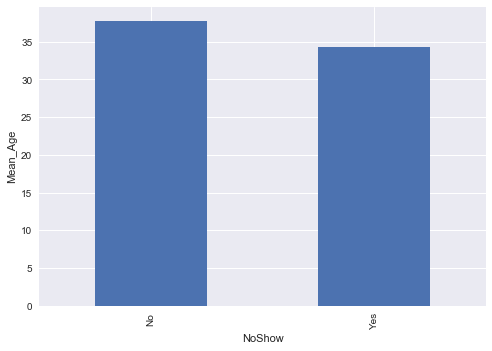

In [47]:
df.groupby('NoShow')['Age'].mean().plot.bar()
plt.ylabel('Mean_Age');

# Missing values treatment & Outlier treatment

In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 22 columns):
Patient_ID            110519 non-null int64
Appointment_ID        110519 non-null int64
Gender                110519 non-null object
Scheduled_Day         110519 non-null datetime64[ns]
Appointment_Day       110519 non-null datetime64[ns]
Age                   110519 non-null int64
Neighbourhood         110519 non-null object
Scholarship           110519 non-null int64
Hypertension          110519 non-null int64
Diabetes              110519 non-null int64
Alcoholism            110519 non-null int64
Handicap              110519 non-null int64
SMS_received          110519 non-null int64
NoShow                110519 non-null object
Day_Scheduled         110519 non-null int64
weekday_Scheduled     110519 non-null int64
Month_Scheduled       110519 non-null int64
Day_appointed         110519 non-null int64
weekday_appointed     110519 non-null int64
Month_appointed       110519 non

In [448]:
df.isnull().sum()

Patient_ID            0
Appointment_ID        0
Gender                0
Scheduled_Day         0
Appointment_Day       0
Age                   0
Neighbourhood         0
Scholarship           0
Hypertension          0
Diabetes              0
Alcoholism            0
Handicap              0
SMS_received          0
NoShow                0
Day_Scheduled         0
weekday_Scheduled     0
Month_Scheduled       0
Day_appointed         0
weekday_appointed     0
Month_appointed       0
awaiting_time_days    0
appointment_dow       0
dtype: int64

In [449]:
#No Outlier

# FEATURE ENGINEERING


Feature engineering is the science (and art) of extracting more information from existing data. You are not adding any new data here, but you are actually making the data you already have more useful.

Feature engineering itself can be divided in 2 steps:

- Variable transformation.
- Variable / Feature creation


Variable Transformation

In data modelling, transformation refers to the replacement of a variable by a function. For instance, replacing a variable x by the square / cube root or logarithm x is a transformation. In other words, transformation is a process that changes the distribution or relationship of a variable with others.

Here in this case study , I do not see any transformations are required for the variables listed for this dataset


Variable creation


Yes the Appointment Time and Scheduled Time are converted into day of month with names Day_Scheduled and Day_appointed
- Let us drop unnecessary columns

In [450]:
df.columns

Index(['Patient_ID', 'Appointment_ID', 'Gender', 'Scheduled_Day',
       'Appointment_Day', 'Age', 'Neighbourhood', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
       'NoShow', 'Day_Scheduled', 'weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'weekday_appointed', 'Month_appointed',
       'awaiting_time_days', 'appointment_dow'],
      dtype='object')

In [451]:
df.drop(['Appointment_ID', 'Scheduled_Day', 'Appointment_Day'], axis = 1, inplace = True)

In [452]:
df['weekday_appointed'].unique()

array([4, 1, 0, 2, 3, 5])

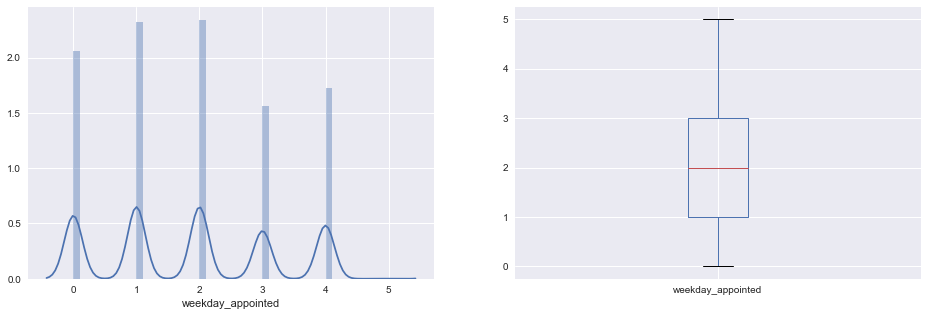

In [453]:
# The day of the week with Monday=0, Sunday=6
plt.figure(1)
plt.subplot(121)
sns.distplot(df['weekday_appointed'])


plt.subplot(122)
df['weekday_appointed'].plot.box(figsize=(16,5))

plt.show()

Tuesday and Wednesday have maximum number of appointments

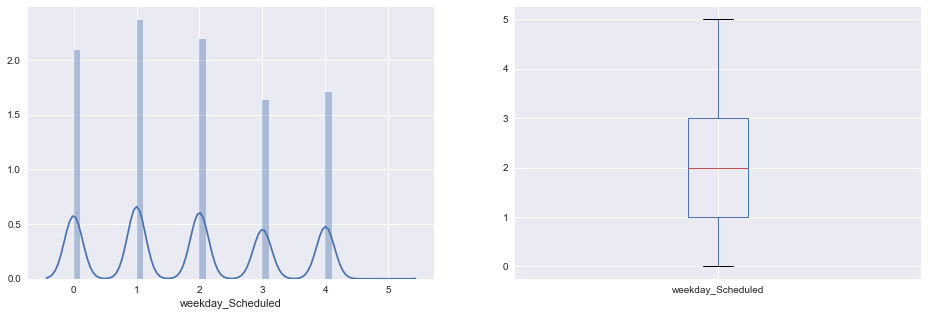

In [454]:
# The day of the week with Monday=0, Sunday=6
plt.figure(1)
plt.subplot(121)
sns.distplot(df['weekday_Scheduled'])


plt.subplot(122)
df['weekday_Scheduled'].plot.box(figsize=(16,5))

plt.show()

# QUESTIONS & ANSWERS

## Gender difference V/S Show / No-Show

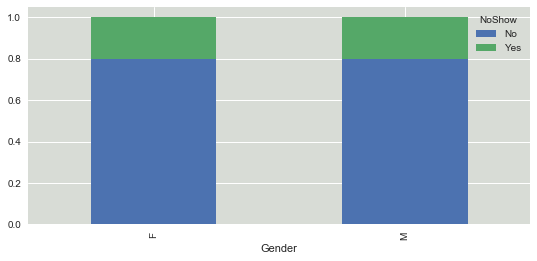

In [455]:
fig, ax = plt.subplots()
Gender=pd.crosstab(df['Gender'],df['NoShow'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(9,4),  ax = ax);
ax.set_facecolor('#d8dcd6')

There is not much of difference with gender in having the status with Show/NoShow

## Age difference V/S Show / No-Show

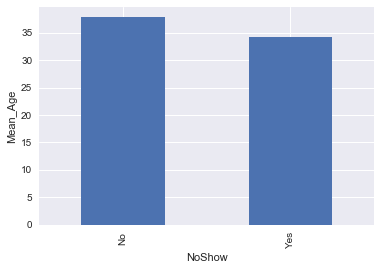

In [456]:
fig, ax = plt.subplots()
df.groupby('NoShow')['Age'].mean().plot.bar()
plt.ylabel('Mean_Age');

The mean age group of instances with "NoShow = Yes" have lesser age

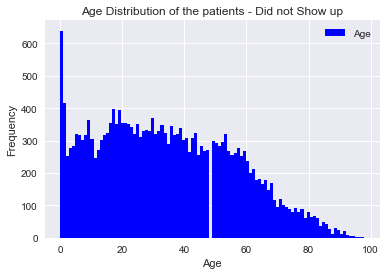

In [457]:
# distribution for only NoShow = 1 / Yes
df_NoShow = df[df['NoShow']  == "Yes"]
df_NoShow.plot(kind = "hist",y = "Age",bins = 100, color = 'b') 
plt.title('Age Distribution of the patients - Did not Show up')
plt.xlabel('Age');

Of those patients who have showed up for appointment, majority patients with age group from 20 to 40 did not show up for the appointment when compared to age groups 0-20, 40-60 and 60 plus


## On which weekday/day/month maximum appointments are getting finalized with Show status?

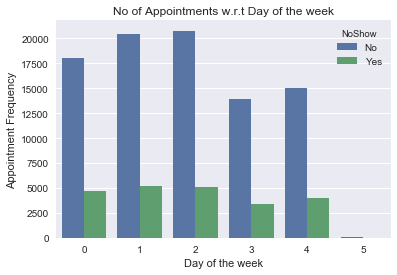

In [458]:
app_weekday = sns.countplot(x = 'weekday_appointed', hue = 'NoShow', data = df)
app_weekday.set_title('No of Appointments w.r.t Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Appointment Frequency')
plt.show()

Majority of the visits or appointments happend on the weeekdays (Monday, Tuesday and Wednesday) when compared to weekends

Conclusion : Majority of the visits or appointments happend on the weeekdays (Monday, Tuesday and Wednesday) when compared to weekends. Hence weekdays are the best for good conversion for appointment

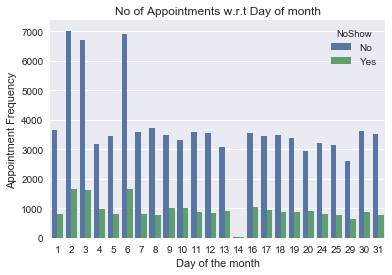

In [459]:
app_weekday = sns.countplot(x = 'Day_appointed', hue = 'NoShow', data = df)
app_weekday.set_title('No of Appointments w.r.t Day of month')
plt.xlabel('Day of the month')
plt.ylabel('Appointment Frequency')
plt.show()

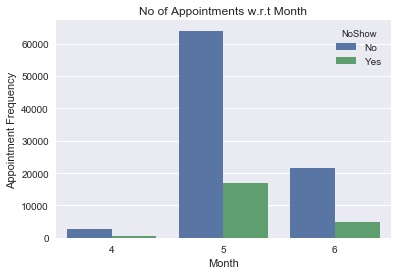

In [460]:
app_month = sns.countplot(x = 'Month_appointed', hue = 'NoShow', data = df)
app_month.set_title('No of Appointments w.r.t Month')
plt.xlabel('Month')
plt.ylabel('Appointment Frequency')
plt.show()

## Are the digital /social media reminders are helping the patients to take doctor's appointment?

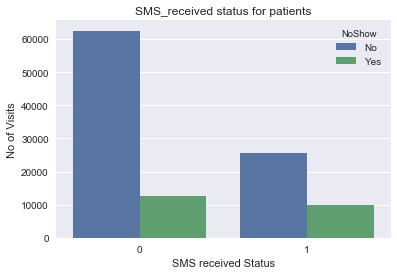

In [461]:
SMS_recieved = sns.countplot(x = 'SMS_received', hue = 'NoShow', data = df)
SMS_recieved.set_title('SMS_received status for patients')
plt.xlabel('SMS received Status')
plt.ylabel('No of Visits')
plt.show()

It can be inferred that patients (~25K visits) who have recieved SMS have turned up for physician visit

Conclusion : If there are any promotions towards digital media either through SMS / emails, the conversion for physician visit will improve and from the data it is inferred that patients (~25K visits) who have recieved SMS have turned up for physician visit.

## Is Scholarship from the government helping patients for good turnaround for physician visits?

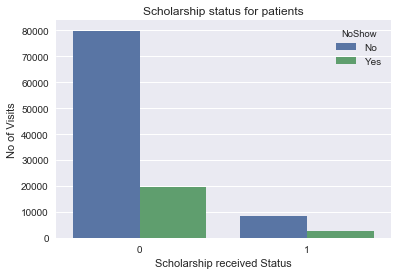

In [462]:
Scholarship = sns.countplot(x = 'Scholarship', hue = 'NoShow', data = df)
Scholarship.set_title('Scholarship status for patients')
plt.xlabel('Scholarship received Status')
plt.ylabel('No of Visits')
plt.show()

We would expect that patients who have got scholarship should have been all attended the physician but it seems that ~25% of patients did not attend

Conclusion : On contrary actually we would expect that patients who have got scholarship should have been all attended the physician but it seems that ~25% of patients did not attend.

## Which neighbourhood regions are actually have higher appointments with physicians?

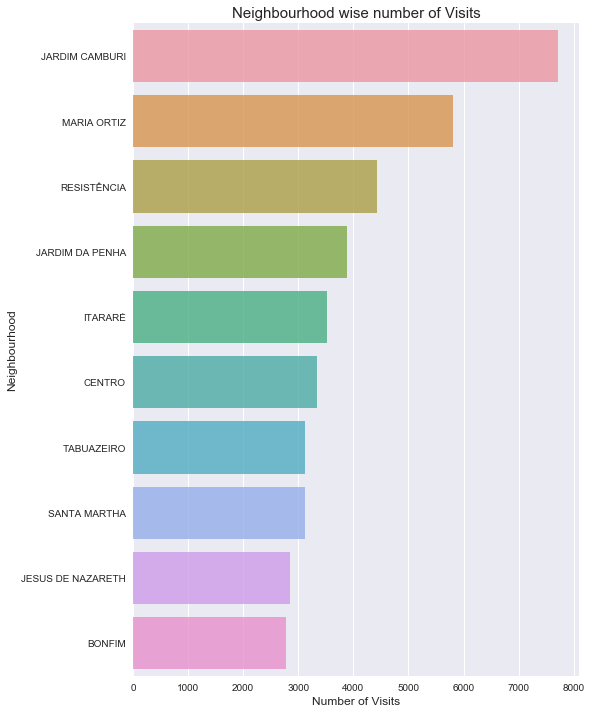

In [463]:
#Top 10 Neighbourhood values based on the Visits

cnt_srs = df['Neighbourhood'].value_counts().head(10)
plt.figure(figsize=(8,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)

plt.xlabel('Number of Visits', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)
plt.title("Neighbourhood wise number of Visits", fontsize=15)
plt.show()

The number of visits are more from the area - Jardim Camburi

Conclusion : Majority of the visits happend from Jardim Camburi, but we are not sure on why this happend. There might be many reasons like majority of the patient population might be from that place or majority of the physicians are from that location. This is one of the limitations

## Are there patients with more than one appointment? If yes, what are the top 10 patients with most appointments?

In [464]:
df['Patient_ID'].value_counts().iloc[0:10]

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
871374938638855    62
258424392677       62
75797461494159     62
6264198675331      62
66844879846766     57
872278549442       55
Name: Patient_ID, dtype: int64

In [465]:
df.columns

Index(['Patient_ID', 'Gender', 'Age', 'Neighbourhood', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
       'NoShow', 'Day_Scheduled', 'weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'weekday_appointed', 'Month_appointed',
       'awaiting_time_days', 'appointment_dow'],
      dtype='object')

## What factors are important to know in order to predict if a patient will show up for their scheduled appointment?

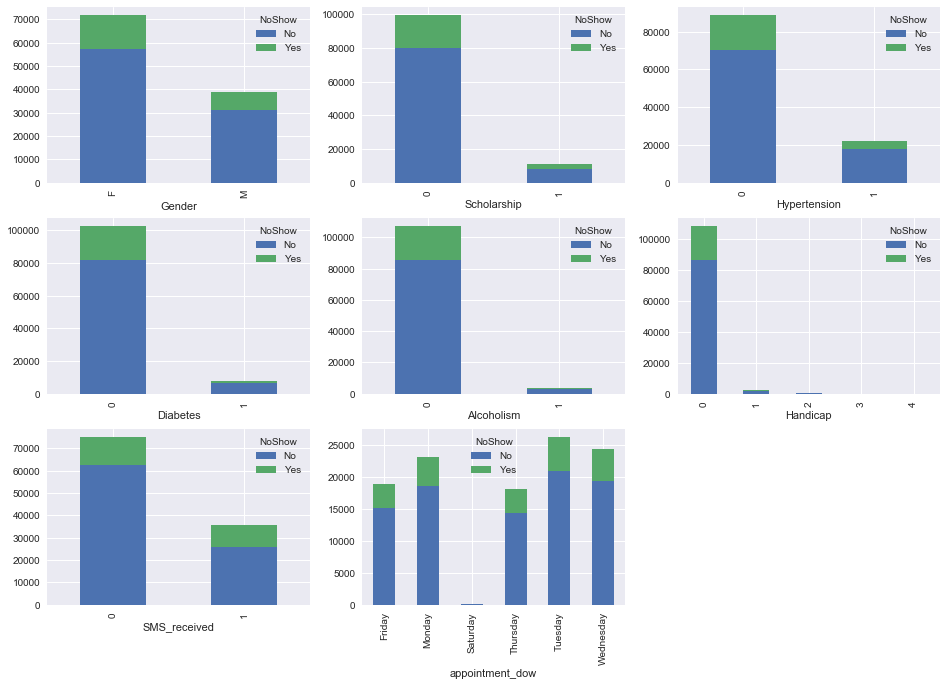

In [466]:
categorical_vars = ['Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'appointment_dow']

fig = plt.figure(figsize=(16, 11))
for i, var in enumerate(categorical_vars):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([var, 'NoShow'])[var].count().unstack('NoShow').plot(ax=ax, kind='bar', stacked=True)

For all categorical variables the distributions of show / no-show for different categories look very similar. There is no clear indication of any of these variables having bigger then others impact on show / no-show characteristics. The charts confirm about 20% no-show rate for most categories.